### machine learing
1. 분석목표 결정
2. 데이터 수집
3. 이상치 제거
4. 데이터간 상관관계 분석 및 시각화
5. 모델 선택 및 파라미터 조정
6. 모델 훈련
7. 예측값 확인

### 목표
- 문제정의
- 500명의 키와 몸무게 데이터를 활용해서 비만도를 예측하는 실습


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("./ml_data/bmi_500.csv",index_col="Label")
df = data.__deepcopy__()

In [14]:
df

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [18]:
df.shape

(500, 3)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### EDA(Exploratory Data Analysis)
- 데이터셋을 분석하고 조사하여 주요 특성을 파악
- 데이터 분석
- 기술통계 확인 - 최대값 최빈값 평균값 4분위수 확인
- 시각화 - 데이터의 분포 현황 살펴보기

In [20]:
# 기술 통계량 확인
df.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [23]:
# 정답데이터(Label) 분포
# Label
np.unique(df.index,return_counts=True)
# Obesity = '비만'
# Normal = '정상'
# Overweight = '과체중'
# Extreme Obesity = '고도 비만'
# Weak = '저체중'
# Extreme Weak = '과한 저체중'

(array(['Extreme Obesity', 'Extremely Weak', 'Normal', 'Obesity',
        'Overweight', 'Weak'], dtype=object),
 array([198,  13,  69, 130,  68,  22], dtype=int64))

In [32]:
# 데이터의 분포확인
# 산점도(scatter)
df_ex = df.loc[df.index =='Extreme Obesity']
df_ex

,Gender,Height,Weight
Label,,,
Extreme Obesity,Male,147,92
Extreme Obesity,Male,154,111
Extreme Obesity,Female,153,107
Extreme Obesity,Female,157,110
Extreme Obesity,Male,140,129
...,...,...,...
Extreme Obesity,Male,152,98
Extreme Obesity,Female,150,153
Extreme Obesity,Female,141,136


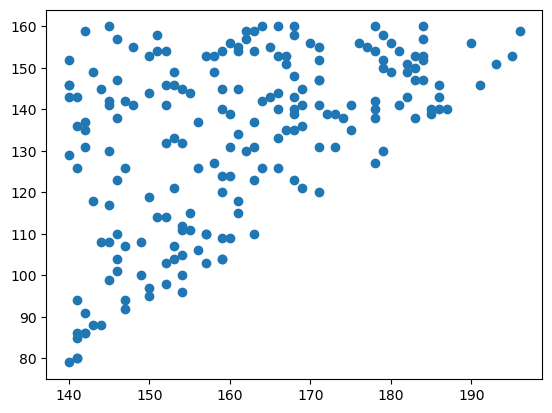

In [34]:
plt.scatter(df_ex['Height'],df_ex['Weight'])

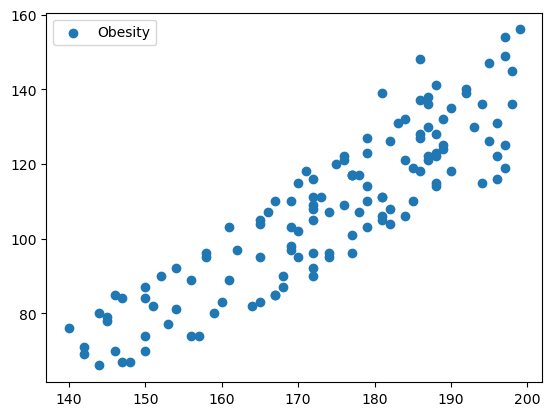

In [37]:
#Obesity 시각화
df_ob = df.loc[df.index =='Obesity']
plt.scatter(df_ob['Height'],df_ob['Weight'], c= 'red' label='Obesity')
plt.legend()

In [38]:
# 똑같은 작업을 계속 반복하기 때문에 위 코드를 함수화
def graph_draw(lable,color):
    d = df.loc[lable]
    plt.scatter(d['Height'],d['Weight'],c=color,label= lable)

In [ ]:
# 'Extreme Obesity', 'Extremely Weak', 'Normal', 'Obesity', 'Overweight', 'Weak'

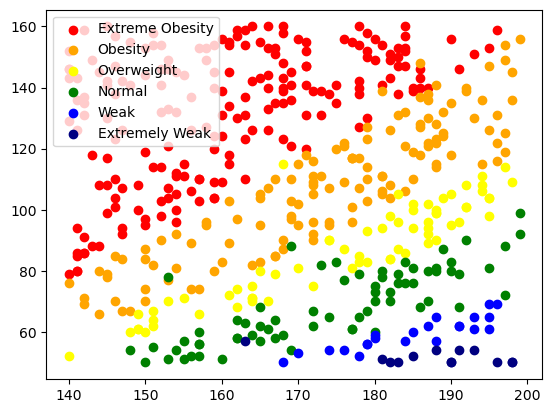

In [41]:
graph_draw('Extreme Obesity','red')
graph_draw('Obesity','orange')
graph_draw('Overweight','yellow')
graph_draw('Normal','green')
graph_draw('Weak','blue')
graph_draw('Extremely Weak','navy')
plt.legend()
plt.show()

#### 모델링 전 작업
- 데이터 분리
1. 문제 데이터, 정답데이터 분리
- 문제데이터 X , 독립변수, 특성, feature, 속성, 입력데이터
- 정답 데이터 y , 종속변수, label, 라벨, 타겟, target, 출력데이터
- 학습용 데이터 x, 테스트 데이터 y

In [42]:
# 데이터 분리
# 문제데이터, 정답데이터 분리
# X : Height, Weight
# y : Label

In [46]:
X = df[['Height','Weight']]
X

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61
...,...,...
Extreme Obesity,150,153
Obesity,184,121
Extreme Obesity,141,136


In [48]:
y = df.index
y

Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity',
       ...
       'Normal', 'Extreme Obesity', 'Extremely Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity'],
      dtype='object', name='Label', length=500)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [50]:
print("훈련용 문제:",x_train.shape)
print("훈련용 답:",x_test.shape)
print("테스트용 문제:",y_train.shape)
print("테스트용 답:",y_test.shape)

훈련용 문제: (350, 2)
훈련용 답: (150, 2)
테스트용 문제: (350,)
테스트용 답: (150,)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
m = knn.fit(x_train,y_train)
m


KNeighborsClassifier()

In [63]:
pre = m.predict(x_test)

In [64]:
accuracy_score(pre,y_test)

0.9066666666666666